## Checking Data

I run the first checks on the data to understand the data better and obtain star formation rates

In [1]:
!pwd #Checking the location of the current directory

/Users/brian/Library/CloudStorage/OneDrive-UniversityofHertfordshire/DwarfAGN/analysis


In [2]:
# dire = '/Users/brian/Library/CloudStorage/OneDrive-UniversityofHertfordshire/DwarfAGN/dwarf_agn/emcee/' # my data
dire = '/Users/brian/Documents/Hertfordshire/dwarf_agn/emcee/' # Ryan's data

In [3]:
import prospect.io.read_results as reader
results_type = "emcee"
res, obs, model = reader.results_from("{}gal_3009_{}_mcmc.h5".format(dire,results_type), dangerous=False)

In [4]:
import h5py
f = h5py.File("{}gal_3009_{}_mcmc.h5".format(dire,results_type), 'r')


In [5]:
list(f.keys())

['obs', 'sampling']

In [6]:
dset = f['obs']

In [7]:
import h5py
filename = "{}gal_3009_{}_mcmc.h5".format(dire,results_type)

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    data = list(f[a_group_key])
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array


Keys: <KeysViewHDF5 ['obs', 'sampling']>
<class 'h5py._hl.group.Group'>


TypeError: Accessing a group is done with bytes or str,  not <class 'tuple'>

In [8]:
ds_obj

<Closed HDF5 group>

At the moment I am having trouble retreiving sps; "AttributeError: module '' has no attribute 'build_sps'"

In [9]:
#The following commented lines reconstruct the model and sps object, 
# if a parameter file continaing the `build_*` methods was saved along with the results

'''
model = reader.get_model(res)
sps = reader.get_sps(res)
'''

'\nmodel = reader.get_model(res)\nsps = reader.get_sps(res)\n'

In [10]:
# let's look at what's stored in the `result` dictionary
print(res.keys()) # currently no ouput for the model

dict_keys(['model_params', 'optimizer_duration', 'paramfile_text', 'prospector_version', 'run_params', 'acceptance', 'chain', 'initial_theta', 'lnprobability', 'sampling_initial_center', 'rstate', 'sampling_duration', 'theta_labels', 'bestfit', 'optimization', 'obs', 'model'])


In [11]:
res['obs']['redshift'] #accessing the redshift of the 

0.281

In [12]:
res['obs']

{'maggies': array([7.21218003e-11, 3.52321452e-11, 1.73456322e-10, 2.85740425e-10,
        3.53787819e-10, 3.89202675e-10, 3.95005110e-10, 2.19905767e-10,
        2.17023873e-10,            nan, 4.39289318e-10]),
 'maggies_unc': array([1.46838818e-11, 1.89676705e-11, 1.83954605e-12, 2.12117504e-12,
        2.45298577e-12, 3.85795320e-12, 9.26553082e-12, 6.56747115e-12,
        7.40364123e-12,            nan, 1.72008130e-10]),
 'phot_mask': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True]),
 'phot_wave': array([ 1528.05975153,  2271.12579359,  4755.40298706,  6184.09154942,
         7661.32077169,  8896.88932753,  9761.71612297, 35378.51012199,
        44780.55099406, 56962.1965764 , 77980.20467193]),
 'filternames': ['galex_FUV',
  'galex_NUV',
  'hsc_g',
  'hsc_r',
  'hsc_i',
  'hsc_z',
  'hsc_y',
  'spitzer_irac_ch1',
  'spitzer_irac_ch2',
  'spitzer_irac_ch3',
  'spitzer_irac_ch4'],
 'filters': [<class 'sedpy.observate.Filter'>(galex_FUV),


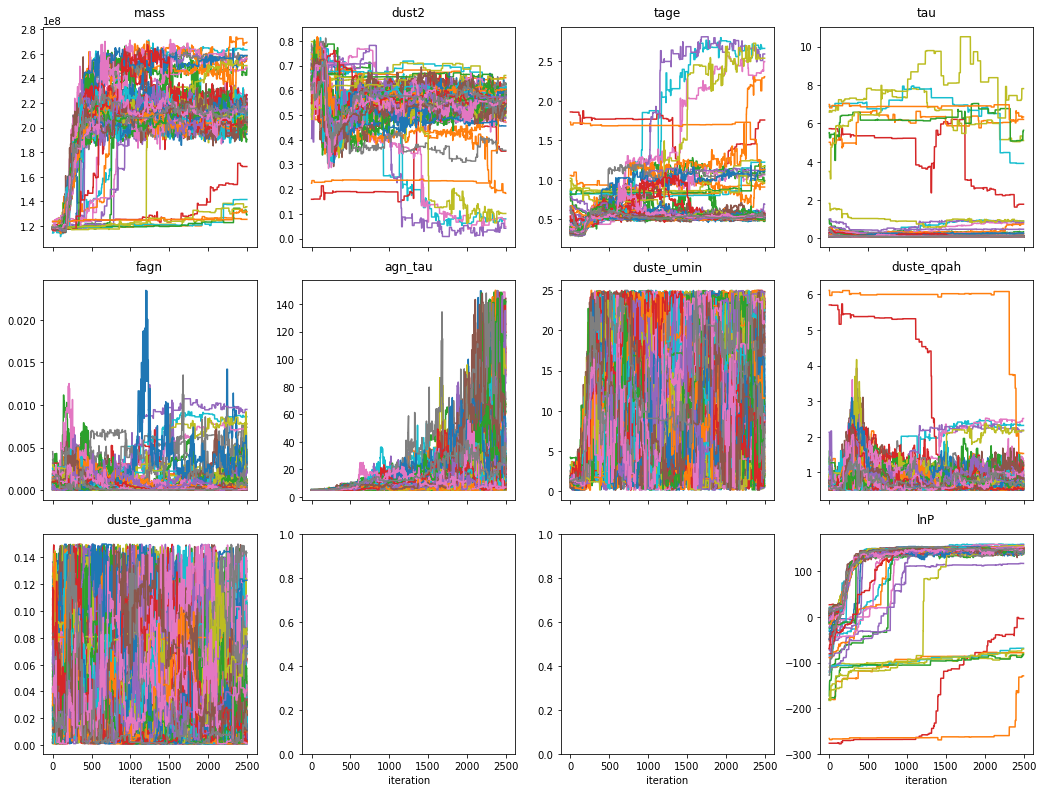

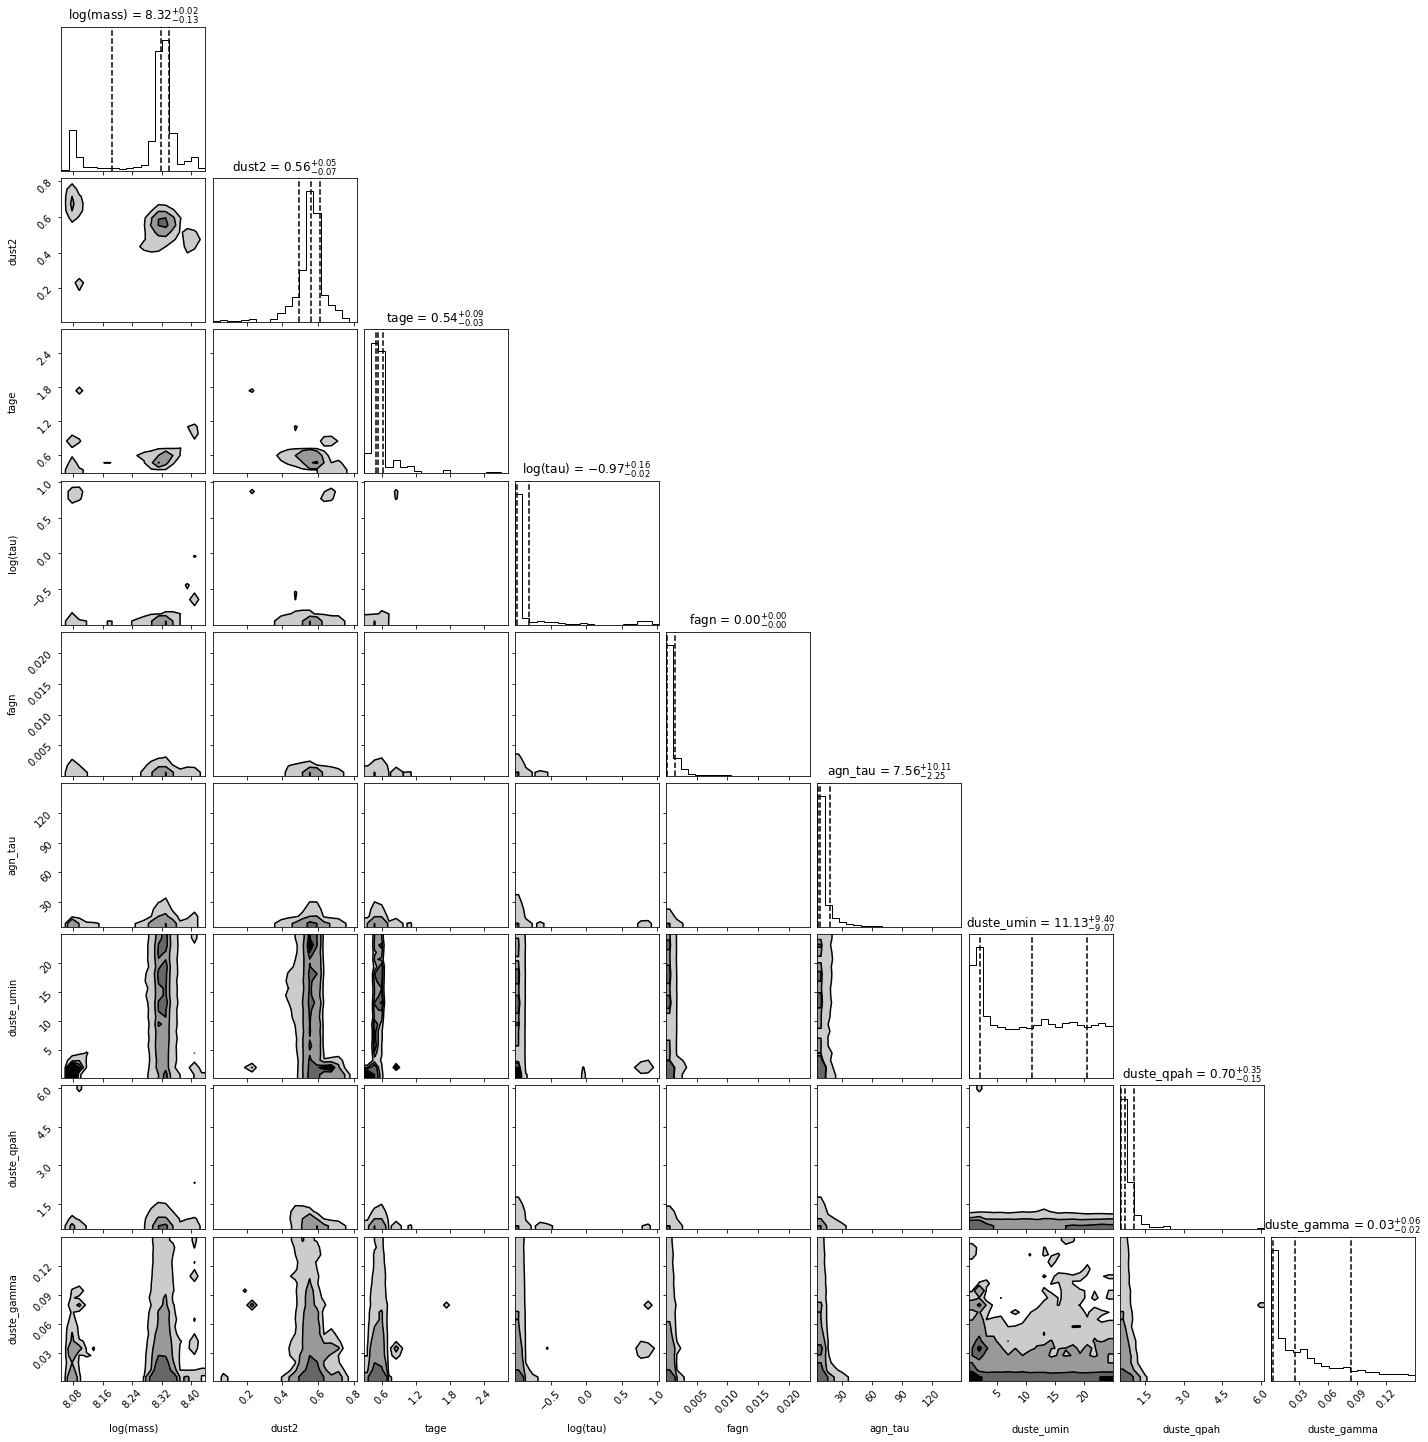

In [13]:
# Trace plots
tfig = reader.traceplot(res)
# Corner figure of posterior PDFs
cfig = reader.subcorner(res)

In [14]:
mass, dust, tage, tau, fagn, agn_tau, duste_umin, duste_qpah, duste_gamma

NameError: name 'mass' is not defined

## Getting the Star Formation Rate:
Obtaining the star formation rate requires an estimate of the tage, tau and mass, The star formation rate is the area under the curve of tage and tau, within the mass range of the galaxy in question. For our case we estimate the star formation rate of one of the galaxies in our result.

In [15]:
import numpy as np
from scipy.special import gamma, gammainc

tage, tau, mass = 1.16, 0.96, 10**7.89
# for delay tau this function gives the (unnormalized) SFR 
# for any t, tau combo in M_sun/Gyr
# sfr = lambda t,tau: return (t/tau) * np.exp(-t/tau)

sfr = lambda t,tau:(t/tau) * np.exp(-t/tau)
# now we numerically integrate this SFH from 0 to tage to get the mass formed
times = np.linspace(0, tage, 1000)
A = np.trapz(sfr(times, tau), times)
# But this could also be done using an incomplete gamma function (integral of xe^{-x})
A = tau * gamma(2) * gammainc(2, tage/tau)
# and now we renormalize the formed mass to the actual mass value 
# to get the the SFR in M_sun per Gyr 
psi = mass * sfr(tage, tau) / A
# if we want SFR in Msun/year
psi /= 1e9

psi

0.08573846865110624

In [16]:
# result["chain"]

In [51]:
# result, obs, _ = reader.results_from(dir_pick+"/dwarf_agn/emcee/gal_"+str(gal)+"_{}_mcmc.h5".format(results_type), dangerous=False)
import prospect.io.read_results as reader
results_type = "emcee"
res, obs, model  = reader.results_from(dire +"gal_3009_{}_mcmc.h5".format(results_type), dangerous=False)

# Maximum posterior probability sample
imax = np.argmax(result['lnprobability'])
csz = result["chain"].shape
# if result["chain"].ndim > 2:
# emcee
i, j = np.unravel_index(imax, result['lnprobability'].shape)
theta_max = result['chain'][i, j, :].copy()
flatchain = result["chain"].reshape(csz[0] * csz[1], csz[2])
#         else:
#     # dynesty
# theta_max = result['chain'][imax, :].copy()
# flatchain = result["chain"]

# 16th, 50th, and 84th percentiles of the posterior
from prospect.plotting.corner import quantile
weights = result.get("weights", None)
post_pcts = quantile(flatchain.T, q=[0.16, 0.50, 0.84], weights=weights)

print(post_pcts) 

[[1.53320615e+08 2.07982550e+08 2.18885842e+08]
 [4.94969713e-01 5.63389451e-01 6.10378283e-01]
 [5.03593660e-01 5.35214672e-01 6.25165938e-01]
 [1.01351075e-01 1.06424637e-01 1.55218718e-01]
 [2.92986676e-05 2.19502843e-04 1.39455918e-03]
 [5.30918123e+00 7.56183417e+00 1.76742730e+01]
 [2.05909698e+00 1.11262985e+01 2.05220237e+01]
 [5.50692716e-01 7.01560710e-01 1.05140139e+00]
 [3.19698189e-03 2.60791136e-02 8.38830075e-02]]


In [54]:
print(res)

{'model_params': [{'N': 1, 'isfree': False, 'init': 0.281, 'units': 'redshift', 'prior': b'\x80\x02cprospect.models.priors\nTopHat\nq\x00)\x81q\x01}q\x02(X\x05\x00\x00\x00aliasq\x03}q\x04(X\x04\x00\x00\x00miniq\x05h\x05X\x04\x00\x00\x00maxiq\x06h\x06uX\x06\x00\x00\x00paramsq\x07}q\x08(h\x05G?\xb9\x99\x99\x99\x99\x99\x9ah\x06G?\xd3333333uX\x04\x00\x00\x00nameq\tX\x00\x00\x00\x00q\nub.', 'name': 'zred'}, {'N': 1, 'isfree': True, 'init': 121758699.28452551, 'units': 'Solar masses formed', 'prior': b'\x80\x02cprospect.models.priors\nLogUniform\nq\x00)\x81q\x01}q\x02(X\x05\x00\x00\x00aliasq\x03}q\x04(X\x04\x00\x00\x00miniq\x05h\x05X\x04\x00\x00\x00maxiq\x06h\x06uX\x06\x00\x00\x00paramsq\x07}q\x08(h\x05GA.\x84\x80\x00\x00\x00\x00h\x06GB\x02\xa0_ \x00\x00\x00uX\x04\x00\x00\x00nameq\tX\x00\x00\x00\x00q\nub.', 'disp_floor': 100000.0, 'name': 'mass'}, {'N': 1, 'isfree': False, 'init': -0.5, 'units': '$\\log (Z/Z_\\odot)$', 'prior': b'\x80\x02cprospect.models.priors\nTopHat\nq\x00)\x81q\x01}q\x02

In [46]:
# Plot the stored maximum ln-probability sample
import matplotlib.pyplot as pl

best = res["bestfit"]
# a = model.params["zred"] + 1
# pl.plot(a * best["restframe_wavelengths"], best['spectrum'], label="MAP spectrum")
if obs['filters'] is not None:
    pwave = [f.wave_effective for f in obs["filters"]]
    pl.plot(pwave, best['photometry'], label="MAP photometry")
    pl.set_title(best["parameter"])

KeyError: 'photometry'

In [44]:
best

{}

In [18]:
flatchain

array([[1.18620467e+08, 7.10787720e-01, 4.84154526e-01, ...,
        7.34425763e-01, 5.06014551e-01, 2.70278501e-02],
       [1.18620467e+08, 7.10787720e-01, 4.84154526e-01, ...,
        7.34425763e-01, 5.06014551e-01, 2.70278501e-02],
       [1.18615313e+08, 7.11247719e-01, 4.85452432e-01, ...,
        7.22892336e-01, 5.04012495e-01, 2.73872525e-02],
       ...,
       [2.05573049e+08, 5.90386955e-01, 5.11756948e-01, ...,
        5.03779731e+00, 6.26036728e-01, 1.27985659e-02],
       [2.07170845e+08, 5.98323645e-01, 5.10498023e-01, ...,
        8.00810551e+00, 6.30308787e-01, 1.24165628e-02],
       [2.07170845e+08, 5.98323645e-01, 5.10498023e-01, ...,
        8.00810551e+00, 6.30308787e-01, 1.24165628e-02]])

In [19]:
quantile(flatchain.T, q=[0.16, 0.50, 0.84], weights=weights)

array([[1.53320615e+08, 2.07982550e+08, 2.18885842e+08],
       [4.94969713e-01, 5.63389451e-01, 6.10378283e-01],
       [5.03593660e-01, 5.35214672e-01, 6.25165938e-01],
       [1.01351075e-01, 1.06424637e-01, 1.55218718e-01],
       [2.92986676e-05, 2.19502843e-04, 1.39455918e-03],
       [5.30918123e+00, 7.56183417e+00, 1.76742730e+01],
       [2.05909698e+00, 1.11262985e+01, 2.05220237e+01],
       [5.50692716e-01, 7.01560710e-01, 1.05140139e+00],
       [3.19698189e-03, 2.60791136e-02, 8.38830075e-02]])

In [20]:
f = np.median(flatchain.T,axis=1)
f

array([2.07982550e+08, 5.63389451e-01, 5.35214672e-01, 1.06424637e-01,
       2.19502843e-04, 7.56183417e+00, 1.11262985e+01, 7.01560710e-01,
       2.60791136e-02])

In [21]:
post_pcts[0,1],post_pcts[1,1]

(207982549.8771388, 0.5633894511906323)

In [22]:
 post_pcts[3,1],  post_pcts[2,1]

(0.10642463687403121, 0.5352146718379499)

In [23]:
np.log10(post_pcts[0,1])

8.318026898376305

In [24]:
10**8.318026898376305

207982549.87713882

In [25]:
import numpy as np
from scipy.special import gamma, gammainc

tage, tau, mass = post_pcts[2,1], post_pcts[3,1], post_pcts[0,1]
# for delay tau this function gives the (unnormalized) SFR 
# for any t, tau combo in M_sun/Gyr
# sfr = lambda t,tau: return (t/tau) * np.exp(-t/tau)

sfr = lambda t,tau:(t/tau) * np.exp(-t/tau)
# now we numerically integrate this SFH from 0 to tage to get the mass formed
times = np.linspace(0, tage, 1000)
A = np.trapz(sfr(times, tau), times)
# But this could also be done using an incomplete gamma function (integral of xe^{-x})
A = tau * gamma(2) * gammainc(2, tage/tau)
# and now we renormalize the formed mass to the actual mass value 
# to get the the SFR in M_sun per Gyr 
psi = mass * sfr(tage, tau) / A
# if we want SFR in Msun/year
psi /= 1e9

psi

0.06696797857907463

In [26]:
# randomly chosen parameters from chain
randint = np.random.randint
if results_type == "emcee":
    nwalkers, niter = run_params['nwalkers'], run_params['niter']
    theta = result['chain'][randint(nwalkers), randint(niter)]
else:
    theta = result["chain"][randint(len(result["chain"]))]

# generate models
# sps = reader.get_sps(result)  # this works if using parameter files
mspec, mphot, mextra = model.mean_model(theta, obs, sps=sps)
mspec_map, mphot_map, _ = model.mean_model(theta_max, obs, sps=sps)

# Make plot of data and model
figure(figsize=(16,8))

loglog(wspec, mspec, label='Model spectrum (random draw)',
       lw=0.7, color='navy', alpha=0.7)
loglog(wspec, mspec_map, label='Model spectrum (MAP)',
       lw=0.7, color='green', alpha=0.7)
errorbar(wphot, mphot, label='Model photometry (random draw)',
         marker='s', markersize=10, alpha=0.8, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='blue', 
         markeredgewidth=3)
errorbar(wphot, mphot_map, label='Model photometry (MAP)',
         marker='s', markersize=10, alpha=0.8, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='green', 
         markeredgewidth=3)
errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'], 
         label='Observed photometry', ecolor='red', 
         marker='o', markersize=10, ls='', lw=3, alpha=0.8, 
         markerfacecolor='none', markeredgecolor='red', 
         markeredgewidth=3)

# plot transmission curves
for f in obs['filters']:
    w, t = f.wavelength.copy(), f.transmission.copy()
    t = t / t.max()
    t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
    loglog(w, t, lw=3, color='gray', alpha=0.7)

xlabel('Wavelength [A]')
ylabel('Flux Density [maggies]')
xlim([xmin, xmax])
ylim([ymin, ymax])
legend(loc='best', fontsize=20)
tight_layout()

NameError: name 'run_params' is not defined

In [27]:
showpars=None
try:
    import corner as triangle
except(ImportError):
    import triangle
except:
    raise ImportError("Please install the `corner` package.")

# pull out the parameter names and flatten the thinned chains
# Get parameter names
try:
    parnames = np.array(res['theta_labels'], dtype='U20')
except(KeyError):
    parnames = np.array(res['model'].theta_labels())
# Restrict to desired parameters
if showpars is not None:
    ind_show = np.array([parnames.tolist().index(p) for p in showpars])
    parnames = parnames[ind_show]
else:
    ind_show = slice(None)

# Get the arrays we need (trace, wghts)
trace = res['chain'][..., ind_show]
if trace.ndim == 2:
    trace = trace[None, :]
trace = trace[chains, start::thin, :]
wghts = res.get('weights', None)
if wghts is not None:
    wghts = wghts[start::thin]
samples = trace.reshape(trace.shape[0] * trace.shape[1], trace.shape[2])

# logify some parameters
xx = samples.copy()
if truths is not None:
    xx_truth = np.array(truths).copy()
else:
    xx_truth = None
for p in logify:
    if p in parnames:
        idx = parnames.tolist().index(p)
        xx[:, idx] = np.log10(xx[:, idx])
        parnames[idx] = "log({})".format(parnames[idx])
        if truths is not None:
            xx_truth[idx] = np.log10(xx_truth[idx])

# mess with corner defaults
corner_kwargs = {"plot_datapoints": False, "plot_density": False,
                 "fill_contours": True, "show_titles": True}
corner_kwargs.update(kwargs)

fig = triangle.corner(xx, labels=parnames, truths=xx_truth,
                      quantiles=[0.16, 0.5, 0.84], weights=wghts, **corner_kwargs)

return fig

NameError: name 'chains' is not defined

In [28]:
# Plot the stored maximum ln-probability sample
import matplotlib.pyplot as pl

best = res["bestfit"]
a = 1
pl.plot( a * best["restframe_wavelengths"], best['spectrum'], label="MAP spectrum")
if obs['filters'] is not None:
    pwave = [f.wave_effective for f in obs["filters"]]
    pl.plot(pwave, best['photometry'], label="MAP photometry")
    pl.set_title(best["parameter"])


KeyError: 'restframe_wavelengths'

In [29]:
# Plot the stored maximum ln-probability sample
import matplotlib.pyplot as pl

best = res["bestfit"]
a = model.params["zred"] + 1
pl.plot(a * best["restframe_wavelengths"], best['spectrum'], label="MAP spectrum")
if obs['filters'] is not None:
    pwave = [f.wave_effective for f in obs["filters"]]
    pl.plot(pwave, best['photometry'], label="MAP photometry")
    pl.set_title(best["parameter"])

AttributeError: 'NoneType' object has no attribute 'params'

In [30]:
import matplotlib.pyplot as pl
from prospect.plotting import corner
nsamples, ndim = res["chain"].shape
cfig, axes = pl.subplots(ndim, ndim, figsize=(10,9))
axes = corner.allcorner(res["chain"].T, res["theta_labels"], axes, weights=out["weights"], color="royalblue", show_titles=True)

from prospect.plotting.utils import best_sample
pbest = best_sample(out)
corner.scatter(pbest[:, None], axes, color="firebrick", marker="o")

ValueError: too many values to unpack (expected 2)

In [31]:
import numpy as np

In [ ]:
# Maximum posterior probability sample
imax = np.argmax(res['lnprobability'])
csz = res["chain"].shape
if res["chain"].ndim > 2:
    # emcee
    i, j = np.unravel_index(imax, res['lnprobability'].shape)
    theta_max = res['chain'][i, j, :].copy()
    flatchain = res["chain"].reshape(csz[0] * csz[1], csz[2])
else:
    # dynesty
    theta_max = res['chain'][imax, :].copy()
    flatchain = res["chain"]

# 16th, 50th, and 84th percentiles of the posterior
from prospect.plotting.corner import quantile
weights = res.get("weights", None)
post_pcts = quantile(flatchain.T, q=[0.16, 0.50, 0.84], weights=weights)

In [ ]:
#

In [ ]:
# Choose the walker and iteration number by hand.
walker, iteration = 0, -1
if res["chain"].ndim > 2:
    # if you used emcee for the inference
    theta = res['chain'][walker, iteration, :]
else:
    # if you used dynesty
    theta = res['chain'][iteration, :]

# Or get a fair sample from the posterior
from prospect.plotting.utils import sample_posterior
theta = sample_posterior(res["chain"], weights=res.get("weights", None), nsample=1)[0,:]

# Get the modeled spectra and photometry.
# These have the same shape as the obs['spectrum'] and obs['maggies'] arrays.
spec, phot, mfrac = model.predict(theta, obs=res['obs'], sps=sps)
# mfrac is the ratio of the surviving stellar mass to the formed mass (the ``"mass"`` parameter).

# Plot the model SED
import matplotlib.pyplot as pl
wave = [f.wave_effective for f in res['obs']['filters']]
sedfig, sedax = pl.subplots()
sedax.plot(wave, res['obs']['maggies'], '-o', label='Observations')
sedax.plot(wave, phot, '-o', label='Model at {},{}'.format(walker, iteration))
sedax.set_ylabel("Maggies")
sedax.set_xlabel("wavelength")
sedax.set_xscale('log')

# Plot residuals for this walker and iteration
chifig, chiax = pl.subplots()
chi = (res['obs']['maggies'] - phot) / res['obs']['maggies_unc']
chiax.plot(wave, chi, 'o')
chiax.set_ylabel("Chi")
chiax.set_xlabel("wavelength")
chiax.set_xscale('log')


In [ ]:
# Plot the stored maximum ln-probability sample
import matplotlib.pyplot as pl

best = res["bestfit"]
a = model.params["zred"] + 1
pl.plot(a * best["restframe_wavelengths"], best['spectrum'], label="MAP spectrum")
if obs['filters'] is not None:
    pwave = [f.wave_effective for f in obs["filters"]]
    pl.plot(pwave, best['photometry'], label="MAP photometry")
    pl.set_title(best["parameter"])

In [ ]:
import prospect.io.read_results as reader

results_type = "emcee" # | "dynesty"
# grab results (dictionary), the obs dictionary, and our corresponding models
# When using parameter files set `dangerous=True`
result, obs, _ = reader.results_from("{}gal_5586_{}_mcmc.h5".format(dire,results_type), dangerous=False)

#The following commented lines reconstruct the model and sps object, 
# if a parameter file continaing the `build_*` methods was saved along with the results
# model = reader.get_model(result)
# sps = reader.get_sps(result)

# let's look at what's stored in the `result` dictionary
print(result.keys())

In [ ]:
import numpy as np

In [ ]:
if results_type == "emcee":
    chosen = np.random.choice(result["run_params"]["nwalkers"], size=10, replace=False)
    tracefig = reader.traceplot(result, figsize=(20,10), chains=chosen)
else:
    tracefig = reader.traceplot(result, figsize=(20,10))

In [ ]:
import prospect.io.read_results as reader
filename = "/Users/brian/Library/CloudStorage/OneDrive-UniversityofHertfordshire/DwarfAGN/dwarf_agn/emcee/gal_5586_emcee_mcmc.h5"
results, obs, model = reader.results_from(filename)
# results, obs, _ = reader.results_from("{}gal_5586_{}_mcmc.h5".format(dire,results_type), dangerous=False)

In [ ]:
tracefig = reader.traceplot(results)

In [ ]:
sps = reader.get_sps(res)

In [ ]:
cornerfig = reader.subcorner(results, showpars=model.theta_labels()[:5])

In [33]:
import numpy as np
# Find the index of the maximum a posteriori sample
ind_max = results["lnprobability"].argmax()
if res["chain"].ndim > 2:
    # emcee
    walker, iteration = np.unravel_index(ind_max, results["lnprobability"].shape)
    theta_max = results["chain"][walker, iteration, :]
elif res["chain"].ndim == 2:
    # dynesty
    theta_max = results["chain"][indmax, :]

# We need the SPS object to generate a model
sps = reader.get_sps(results)
# now generate the SED for the max. a post. parameters
spec, phot, x = model.predict(theta_max, obs=obs, sps=sps)

# Plot the data and the MAP model on top of each other
import matplotlib.pyplot as pl
if obs['wave'] is None:
            wave = sps.wavelengths
else:
    wave = obs['wavelength']
pl.plot(wave, obs['spectrum'], label="Spec Data")
pl.plot(wave, spec, label="MAP model spectrum")
if obs['filters'] is not None:
    pwave = [f.wave_effective for f in obs["filters"]]
    pl.plot(pwave, obs['maggies'], label="Phot Data")
    pl.plot(pwave, phot, label="MAP model photometry")

NameError: name 'results' is not defined

In [36]:
# randomly chosen parameters from chain
# randint = np.random.randint
# if results_type == "emcee":
#     nwalkers, niter = run_params['nwalkers'], run_params['niter']
#     theta = result['chain'][randint(nwalkers), randint(niter)]
# else:
#     theta = result["chain"][randint(len(result["chain"]))]

# generate models
# sps = reader.get_sps(result)  # this works if using parameter files
mspec, mphot, mextra = model.mean_model(theta, obs, sps=sps)
mspec_map, mphot_map, _ = model.mean_model(theta_max, obs, sps=sps)

# Make plot of data and model
figure(figsize=(16,8))

loglog(wspec, mspec, label='Model spectrum (random draw)',
       lw=0.7, color='navy', alpha=0.7)
loglog(wspec, mspec_map, label='Model spectrum (MAP)',
       lw=0.7, color='green', alpha=0.7)
errorbar(wphot, mphot, label='Model photometry (random draw)',
         marker='s', markersize=10, alpha=0.8, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='blue', 
         markeredgewidth=3)
errorbar(wphot, mphot_map, label='Model photometry (MAP)',
         marker='s', markersize=10, alpha=0.8, ls='', lw=3, 
         markerfacecolor='none', markeredgecolor='green', 
         markeredgewidth=3)
errorbar(wphot, obs['maggies'], yerr=obs['maggies_unc'], 
         label='Observed photometry', ecolor='red', 
         marker='o', markersize=10, ls='', lw=3, alpha=0.8, 
         markerfacecolor='none', markeredgecolor='red', 
         markeredgewidth=3)

# plot transmission curves
for f in obs['filters']:
    w, t = f.wavelength.copy(), f.transmission.copy()
    t = t / t.max()
    t = 10**(0.2*(np.log10(ymax/ymin)))*t * ymin
    loglog(w, t, lw=3, color='gray', alpha=0.7)

xlabel('Wavelength [A]')
ylabel('Flux Density [maggies]')
xlim([xmin, xmax])
ylim([ymin, ymax])
legend(loc='best', fontsize=20)
tight_layout()

AttributeError: 'NoneType' object has no attribute 'mean_model'